파이토치설치 방법
https://jimmy-ai.tistory.com/124

In [1]:
from glob import glob

data_path = 'C:\pythonDir\deep_learning\High_Resolution'
class_paths = glob('C:\pythonDir\deep_learning\High_Resolution\*')
class_names = []
image_paths = []
for i in range(len(class_paths)):
    class_names.append(class_paths[i].split('\\')[-1])
    image_paths.append(data_path+'\\'+class_names[i]+'\\*C7.jpg')
image_paths

['C:\\pythonDir\\deep_learning\\High_Resolution\\S001_E01\\*C7.jpg',
 'C:\\pythonDir\\deep_learning\\High_Resolution\\S001_E02\\*C7.jpg',
 'C:\\pythonDir\\deep_learning\\High_Resolution\\S001_E03\\*C7.jpg',
 'C:\\pythonDir\\deep_learning\\High_Resolution\\S002_E01\\*C7.jpg',
 'C:\\pythonDir\\deep_learning\\High_Resolution\\S002_E02\\*C7.jpg',
 'C:\\pythonDir\\deep_learning\\High_Resolution\\S002_E03\\*C7.jpg',
 'C:\\pythonDir\\deep_learning\\High_Resolution\\S003_E01\\*C7.jpg',
 'C:\\pythonDir\\deep_learning\\High_Resolution\\S003_E02\\*C7.jpg',
 'C:\\pythonDir\\deep_learning\\High_Resolution\\S003_E03\\*C7.jpg',
 'C:\\pythonDir\\deep_learning\\High_Resolution\\S004_E01\\*C7.jpg',
 'C:\\pythonDir\\deep_learning\\High_Resolution\\S004_E02\\*C7.jpg',
 'C:\\pythonDir\\deep_learning\\High_Resolution\\S004_E03\\*C7.jpg',
 'C:\\pythonDir\\deep_learning\\High_Resolution\\S005_E01\\*C7.jpg',
 'C:\\pythonDir\\deep_learning\\High_Resolution\\S005_E02\\*C7.jpg',
 'C:\\pythonDir\\deep_learning\\Hi

In [2]:
image_dirs = []
all_image_dirs = []
for image_path in image_paths:
    image_dirs = glob(image_path)
    all_image_dirs.append(image_dirs)
all_image_dirs = sum(all_image_dirs,[])
# all_image_dirs 모든 이미지 경로

In [3]:
import numpy as np
from PIL import Image

def labeling(y,class_names,cl_name):
        
    for idx,class_name in enumerate(class_names):
        if cl_name == class_name:
            y.append(idx)


x = []
y = []
y_class_names = []
for i in range(len(all_image_dirs)):
    img = Image.open(all_image_dirs[i])
    img = img.resize((100,100))
    img_array = np.array(img)
    cl_name = all_image_dirs[i].split('\\')[4]
    x.append(img_array)
    labeling(y,class_names,cl_name)
    y_class_names.append(cl_name)
    if i%1000 == 0:
        print(i/1000)
x = np.array(x)
x.shape

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0


(7200, 100, 100, 3)

In [4]:
x = x/255

# 정규화시키니 그림이 이상해짐
# x_mean = np.mean(x,axis=(0,1,2))
# x_std = np.std(x,axis=(0,1,2))

# x = (x-x_mean)/x_std
# x

In [5]:
from keras.utils import to_categorical

y = to_categorical(y)

In [6]:
y[399],y[400],y[799],y[800]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.], dtype=float32))

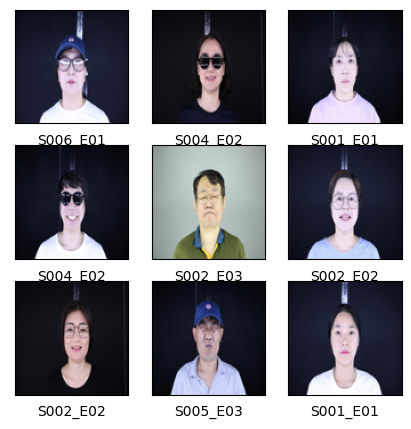

In [7]:
import matplotlib.pyplot as plt

sample_size = 9
random_idx = np.random.randint(7200,size=sample_size) # 0~59999
plt.figure(figsize=(5,5))
for i,idx in enumerate(random_idx):
    plt.subplot(3,3,i+1) # subplot은 1부터~
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_class_names[idx])
    plt.imshow(x[idx],cmap='gray')
plt.show()


In [16]:
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=777)
print(len(x_train),len(x_test),len(y_train),len(y_test))
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=777)
print(len(x_train),len(x_val),len(y_train),len(y_val))

5040 2160 5040 2160
3528 1512 3528 1512


In [17]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   zoom_range=0.2,
                                   width_shift_range= 0.1,
                                   height_shift_range= 0.1,
                                   rotation_range=30,
                                   fill_mode='nearest'
                                   )
val_datagen = ImageDataGenerator() # 검증하는 데이터는 증강할 필요없음, 파라미터 X

batch_size = 32
train_generator = train_datagen.flow(x_train,y_train,batch_size=batch_size)
val_generator = val_datagen.flow(x_val,y_val,batch_size=batch_size)

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Activation,BatchNormalization
from keras.optimizers import Adam

model = Sequential([
    Conv2D(filters=32,kernel_size=3,padding='same',input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=32,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(filters=64,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=64,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Conv2D(filters=128,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),

    Conv2D(filters=128,kernel_size=3,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=(2,2),strides=2,padding='same'),

    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(10,activation='softmax')
])

model.compile(optimizer=Adam(1e-4),loss='sparse_categorical_crossentropy',metrics=['acc'])

def get_step(train_len,batch_size):
  if(train_len % batch_size>0): # 데이터 건수/배치 사이즈
    return train_len//batch_size+1         # // 소숫점이 없는 몫을 구함
  else:
    return train_len//batch_size

history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=get_step(len(x_train),batch_size),
                    validation_data=(val_generator),
                    validation_steps=get_step(len(x_val),batch_size))  
                    # train_generator가 x,y값 다 제공
                    # 책기준 epochs = 100

Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\user\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\user\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\user\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\user\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\user\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\user\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\user\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\user\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\user\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\user\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\user\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\user\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\user\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\user\AppData\Local\Temp\ipykernel_12536\491665035.py", line 49, in <module>
      history = model.fit(train_generator,
    File "C:\Users\user\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\losses.py", line 2098, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\user\anaconda3\lib\site-packages\keras\backend.py", line 5633, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [338,10] and labels shape [576]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_2218]